# Breast Cancer Diagnosis

importing important libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 35

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data set

In [3]:
data = pd.read_csv('data.csv')

checking info of data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

it gives us the summary of features present in the data set

checking the shape of the data set

In [5]:
data.shape

(569, 33)

it shows that it contains 569 rows and 33 columns 

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


it shows the first five values of of our data set

now checking the unique value of each feature

In [7]:
d1 = pd.DataFrame(data.nunique())
d1

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


we had converted the unique value set into dataframe. The numbers of unique values are shown next to feature name.

Now checking the null values present in the data set or not if yes then the number of null value/values present will be shown in True column and the number of not null values will be shown in the false column. 

In [8]:
data.isna().apply(pd.value_counts).T

,False,True
id,569.0,NaN
diagnosis,569.0,NaN
radius_mean,569.0,NaN
texture_mean,569.0,NaN
perimeter_mean,569.0,NaN
area_mean,569.0,NaN
smoothness_mean,569.0,NaN
compactness_mean,569.0,NaN
concavity_mean,569.0,NaN
concave points_mean,569.0,NaN


so, we can tell from the above output that, there is only null values present in 'Unnamed: 32' field and there is all values null in this i.e all 569 values are null so it is better to drop this field and rest of the field does not contain any null value

now, droping 'unnamed: 32' field

In [9]:
data1 = data.drop('Unnamed: 32', axis=1)

In [10]:
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we can see that 'unnamed: 32' has been droped.

Just for information we are checking the data types of each field. 

In [11]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In the above output we can see that only 'diagnosis' field have object type data and it has only 2 unique value as we have already seen above so is better to apply LabelEncoder in this field and for PCA application in is required that all field should contain numeric data.

In [12]:
data1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

importing LabelEncoder from sklearn.preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
data1['diagnosis'] = le.fit_transform(data1['diagnosis'])

diagnosis field has been transformed into numeric data, we already knew that it has two unique value 'M' , 'B' which after applying LabelEncoder has converted to 1, 0 which is shown below.

In [16]:
data1['diagnosis'].unique()

array([1, 0])

# Standardising the Data  

For standardising the data we use StandardScaler function from sklearn.preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()

In [19]:
data1_std = std.fit_transform(data1)

In [20]:
data1_std

array([[-0.23640517,  1.29767572,  1.09706398, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.29767572,  1.82982061, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.29767572,  1.57988811, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  1.29767572,  0.70228425, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.29767572,  1.83834103, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -0.77060855, -1.80840125, ..., -1.74506282,
        -0.04813821, -0.75120669]])

As we can see that our data has been standardise i.e is scaled around a similar range, standardising of data is a very crucial step before performing PCA

In [21]:
data1_std_df = pd.DataFrame(data1_std)

we had stored standardised data into a DataFrame to have a clear view of data which is shown below

In [22]:
data1_std_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.236405,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,1.297676,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,1.297676,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,1.297676,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,1.297676,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# correlation-coefficient

Now, creating correlation coefficient array using numpy function .corrcoef()

In [23]:
corr1 = np.corrcoef(data1_std.T)
corr1

array([[ 1.        ,  0.03976851,  0.07462647, ...,  0.03517358,
        -0.04422425, -0.02986564],
       [ 0.03976851,  1.        ,  0.73002851, ...,  0.79356602,
         0.41629431,  0.32387219],
       [ 0.07462647,  0.73002851,  1.        , ...,  0.7442142 ,
         0.16395333,  0.00706589],
       ...,
       [ 0.03517358,  0.79356602,  0.7442142 , ...,  1.        ,
         0.50252849,  0.51111415],
       [-0.04422425,  0.41629431,  0.16395333, ...,  0.50252849,
         1.        ,  0.53784821],
       [-0.02986564,  0.32387219,  0.00706589, ...,  0.51111415,
         0.53784821,  1.        ]])

The correlation coefficient array will show the correlation between each features with every other features, which identifies the heavily dependent variable which contains redundent data which reduces the performance of the model so it is highly recommeneded that we should get rid of them.

Storing the correlation coefficient array into DataFrame to have a clear view of data

In [24]:
corr1_df = pd.DataFrame(corr1)
corr1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
1,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
2,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
3,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
4,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
5,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
6,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
7,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
8,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
9,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


corr-coef values ranges from 1 to -1, if corr-coef value is 1 than we can say that is heavly correlated where as corr-coef value equals to -1 means least correlation

# Eigen_vectors and Eigen_values

For calculating eigen_vectors and eigen_values we will use linalg function from numpy liebrary

In [25]:
from numpy import linalg as la

In [26]:
eig_val, eig_vec = la.eig(corr1)

In [27]:
eig_vec

array([[-2.20132922e-02, -3.23675385e-02,  9.79034765e-02, ...,
         8.90848848e-05,  7.50778692e-04, -3.94646593e-05],
       [-2.16835592e-01, -7.70349679e-02, -1.04562282e-01, ...,
         1.35318043e-03,  5.64185167e-03, -1.96326330e-03],
       [-2.16404027e-01, -2.26045159e-01, -2.70960919e-04, ...,
         7.02498591e-01,  2.06906549e-01,  2.12831390e-01],
       ...,
       [-2.46161454e-01, -1.78544102e-03, -1.62801516e-01, ...,
        -2.33420367e-03,  3.46780933e-02,  2.27716088e-02],
       [-1.20461432e-01,  1.42764783e-01, -2.71611002e-01, ...,
         2.99451106e-04,  1.28191676e-02,  5.13414698e-03],
       [-1.26524229e-01,  2.76795104e-01, -2.29383010e-01, ...,
         1.68209443e-03,  1.04995787e-02, -2.31595480e-02]])

so above show is eigen_vectors, for every eigen_vectors there is an eigen_value

In [28]:
eig_val

array([1.39240329e+01, 5.73130664e+00, 2.86492379e+00, 1.99913213e+00,
       1.65913439e+00, 1.23470274e+00, 9.78906796e-01, 6.81174904e-01,
       4.69725710e-01, 4.04138074e-01, 3.49167750e-01, 3.03566601e-01,
       2.90848295e-01, 2.61003650e-01, 2.11612257e-01, 1.48555118e-01,
       8.80445608e-02, 7.98097711e-02, 5.87826404e-02, 5.14522733e-02,
       4.79306346e-02, 3.06710366e-02, 2.94706061e-02, 2.73324121e-02,
       2.41885291e-02, 1.75344105e-02, 1.54720775e-02, 8.05020965e-03,
       6.86680063e-03, 1.32627484e-04, 7.41166366e-04, 1.58846587e-03])

Above show is eigen_values which is computed to detemine principal components.

In [29]:
eig_vec_df = pd.DataFrame(eig_vec)

In [30]:
eig_vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.022013,-0.032368,0.097903,0.027300,-0.009117,0.316310,-0.906762,0.099014,-0.150360,-0.158620,-0.059560,-0.048093,-0.016196,-0.003331,-0.031141,0.005257,-0.011772,0.007704,-0.016859,0.003234,-0.018220,0.006149,-0.008023,-0.003743,0.010458,0.004509,-0.001200,0.002569,-0.001810,0.000089,0.000751,-0.000039
1,-0.216836,-0.077035,-0.104562,0.098214,-0.080680,0.005288,0.028818,0.145998,0.198361,0.076739,-0.012466,-0.623834,-0.335630,0.033237,-0.483891,0.248754,-0.180220,-0.001228,0.033041,0.062581,0.088053,-0.033990,0.053551,0.024796,-0.017818,-0.049515,-0.006698,0.023524,-0.012604,0.001353,0.005642,-0.001963
2,-0.216404,-0.226045,-0.000271,-0.051257,0.042020,-0.029793,0.041255,0.105531,0.016627,-0.232560,0.080073,0.027326,0.064967,0.046706,0.029972,0.049412,0.058389,-0.149779,0.203651,0.234199,-0.129470,0.012548,-0.077277,0.071365,0.094523,0.185602,0.023621,-0.129721,0.141994,0.702499,0.206907,0.212831
3,-0.103706,-0.058587,0.057256,0.599487,-0.020158,0.030418,-0.019096,-0.018122,0.061302,0.100103,0.256783,0.332570,-0.149826,0.238097,-0.151619,0.003907,0.107901,-0.158837,-0.035103,-0.040850,-0.059309,0.420584,0.282602,0.103433,-0.001533,-0.096958,-0.086986,-0.022443,0.018245,0.000202,-0.010750,-0.000050
4,-0.224541,-0.207125,-0.000892,-0.052045,0.041831,-0.028623,0.042348,0.094321,0.005334,-0.235151,0.070653,0.054072,0.053526,0.032177,0.003783,0.040137,0.049074,-0.113581,0.194076,0.247894,-0.143719,-0.013492,-0.071569,0.072110,0.037389,0.117555,-0.024512,-0.123557,0.124294,-0.689151,0.384115,0.085755
5,-0.218007,-0.222897,0.037809,-0.061834,0.014292,-0.006413,0.027189,0.035776,0.049416,-0.198613,0.064134,0.046835,0.157352,0.054487,0.013144,-0.023919,0.036818,-0.129779,0.221246,0.247638,0.138303,0.072868,-0.057527,0.089391,-0.007520,-0.067628,0.210325,0.340807,-0.487099,-0.033378,-0.418801,-0.274961
6,-0.137491,0.189042,-0.101731,-0.149217,-0.367699,0.261919,0.137560,0.099449,-0.303182,-0.056163,-0.083925,0.146296,-0.062683,0.308355,0.052196,0.447793,0.064165,-0.203124,0.193437,-0.371501,0.050901,-0.059801,-0.112608,0.053167,0.023859,-0.064374,-0.030190,-0.040014,-0.067880,-0.004841,-0.003365,0.001432
7,-0.231311,0.158967,-0.067796,-0.040524,0.017037,0.004499,0.042472,-0.061094,-0.128519,-0.200352,-0.003483,0.282581,-0.179259,-0.122339,-0.144771,-0.004872,-0.229281,0.169696,-0.004664,0.103855,-0.287320,-0.360571,0.374702,-0.045020,-0.075256,0.094419,-0.395342,0.263983,-0.115096,0.045155,-0.038458,-0.006529
8,-0.251115,0.068175,0.009542,-0.028097,0.089721,0.002251,0.031721,0.090455,-0.095406,0.028392,-0.132828,0.115504,0.228372,0.034254,-0.357238,-0.117087,0.119193,0.270326,-0.005235,-0.027885,-0.020260,0.034800,-0.006315,-0.199688,-0.314918,-0.057699,0.094309,-0.568026,-0.334764,0.024726,-0.011885,0.046116
9,-0.255161,-0.026702,-0.019013,-0.070732,-0.041380,0.034264,0.080222,0.122745,-0.137329,-0.141259,-0.006028,0.066749,-0.037015,0.034453,-0.188856,-0.189186,0.225600,0.381812,0.023344,-0.138842,0.111818,0.201635,-0.079632,-0.334364,0.077395,-0.056844,0.187992,0.404820,0.436768,-0.001296,-0.004993,-0.008587


In [31]:
eig_val_df = pd.DataFrame(eig_val)

In [32]:
eig_val_df

,0
0,13.924033
1,5.731307
2,2.864924
3,1.999132
4,1.659134
5,1.234703
6,0.978907
7,0.681175
8,0.469726
9,0.404138


Now, we will sort the eig_val array to see the highest value of eig_val

In [33]:
eig_val_sort = np.sort(eig_val)[::-1]

In [34]:
eig_val_sort

array([1.39240329e+01, 5.73130664e+00, 2.86492379e+00, 1.99913213e+00,
       1.65913439e+00, 1.23470274e+00, 9.78906796e-01, 6.81174904e-01,
       4.69725710e-01, 4.04138074e-01, 3.49167750e-01, 3.03566601e-01,
       2.90848295e-01, 2.61003650e-01, 2.11612257e-01, 1.48555118e-01,
       8.80445608e-02, 7.98097711e-02, 5.87826404e-02, 5.14522733e-02,
       4.79306346e-02, 3.06710366e-02, 2.94706061e-02, 2.73324121e-02,
       2.41885291e-02, 1.75344105e-02, 1.54720775e-02, 8.05020965e-03,
       6.86680063e-03, 1.58846587e-03, 7.41166366e-04, 1.32627484e-04])

eig_val has been sorted and stored in DataFrame to have clear look on the values.

In [35]:
eig_val_sort_df = pd.DataFrame({'Eigen_value_sort':eig_val_sort})
eig_val_sort_df

,Eigen_value_sort
0,13.924033
1,5.731307
2,2.864924
3,1.999132
4,1.659134
5,1.234703
6,0.978907
7,0.681175
8,0.469726
9,0.404138


We can see that the maximum eig_val = 13.924033 and miminum eig_val = 0.000133

# Eigen_value Plot 

Ploting eig_val as a function of its number

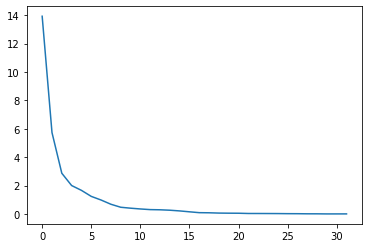

In [36]:
plt.plot(eig_val)
plt.show()

# Principal Component Analysis 

importing PCA function from sklearn.decomposition

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=6)

Here, we taking n_components = 6 , as according to "kiser rule" we retain as many numbers of principal componet that we will obtain from the condition eig_val>1. so from the eig_val array we have seen that there are 6 values of eig_val that is >1 and they are : [13.924033, 5.731307, 2.864924, 1.999132, 1.234703]

In [39]:
pca.fit(data1_std)

PCA(n_components=6)

In [40]:
new_data = pca.transform(data1_std)

In [41]:
data1_std.shape

(569, 32)

In [42]:
new_data.shape

(569, 6)

So, our data is standardised

In [43]:
PCA_df = pd.DataFrame(data=new_data,  columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
PCA_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.216724,2.136750,-0.996666,-3.701990,-1.254757,-1.375765
1,2.651244,-3.770741,-0.554319,-1.133415,0.553632,-0.122292
2,5.900697,-1.010916,-0.467841,-0.933755,-0.194575,-0.402068
3,7.137376,10.315636,-3.256828,-0.053782,-2.944419,-2.566997
4,4.139263,-1.916891,1.465280,-2.877471,0.360750,1.240987
...,...,...,...,...,...,...
564,6.589934,-3.444874,2.510880,-1.174516,-0.126673,2.030415
565,4.020812,-3.546088,1.989122,2.540585,-0.424258,-0.081741
566,1.525754,-1.950552,0.437068,2.092930,1.824089,0.400104
567,10.395832,1.871229,-1.808353,2.159371,0.205779,-0.667193


# Histograms 

Below are histograms of first 3 principal components.

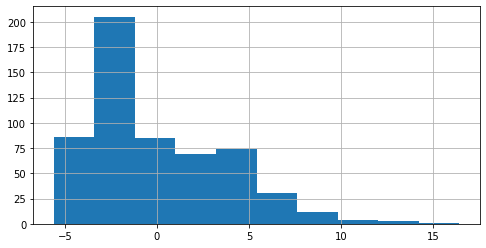

In [44]:
PCA_df['PC1'].hist(figsize=(8,4))
plt.show()

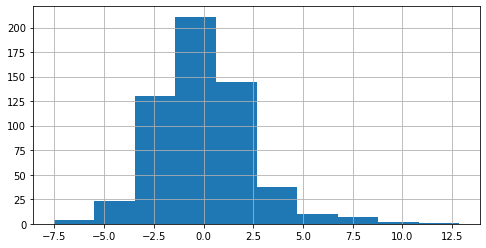

In [45]:
PCA_df['PC2'].hist(figsize=(8,4))
plt.show()

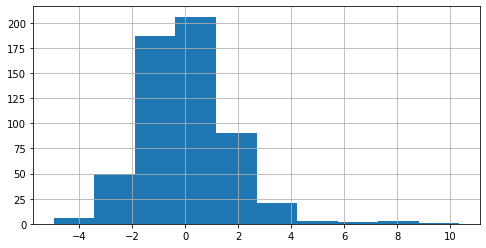

In [46]:
PCA_df['PC3'].hist(figsize=(8,4))
plt.show()

# Presenting Data set in a plane of 2 principal component 

1. presenting data set in a plane of Principal component 1 and Principal component 2

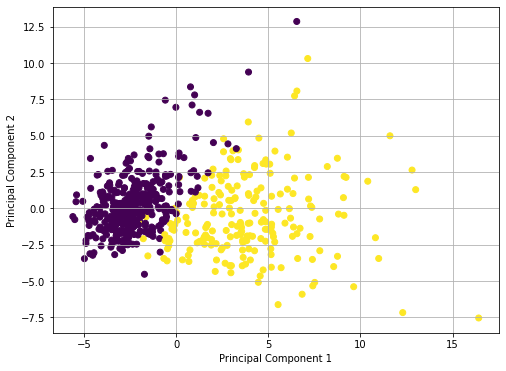

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(PCA_df['PC1'],PCA_df['PC2'], c=data1['diagnosis'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()

2. Presenting data set on a Principal component 1 and Principal component 3

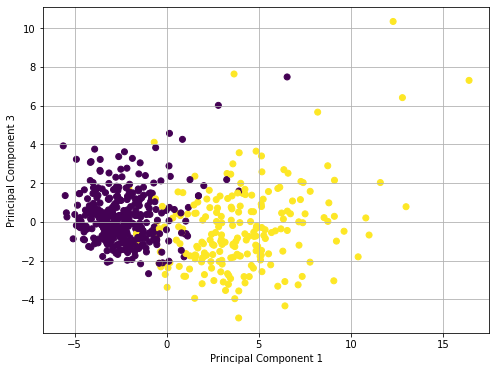

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(PCA_df['PC1'],PCA_df['PC3'], c=data1['diagnosis'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.grid()

3. Presenting data set on a plane of Principal component 2 and Principal component 3

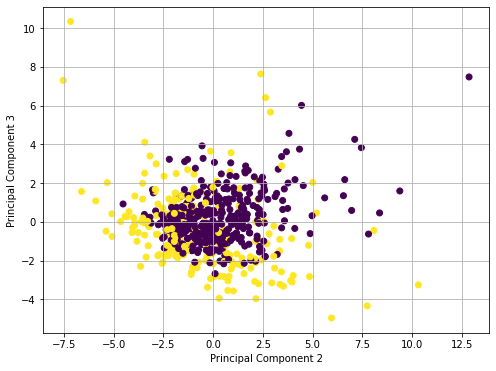

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(PCA_df['PC2'],PCA_df['PC3'], c=data1['diagnosis'])
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")
plt.grid()

# K-Means Clustering

We are forming k-Means clusters for 3 different valus of k i.e k = 2, k = 3, k = 5. so the first one is for k = 2.

In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans1 = KMeans(n_clusters = 2)

In [52]:
Cluster1 = kmeans1.fit(PCA_df)

Predicting cluster labels i.e finding out a perticular data entry is in which cluster. Here two cluster will be formed denoted by 1, 2 and finding centroids

In [53]:
labels1 = kmeans1.predict(PCA_df)
centroids1 = kmeans1.cluster_centers_ 

storing centroid values in a Dataframe 

In [54]:
print(PCA_df.shape)
print(labels1.shape)

(569, 6)
(569,)


In [55]:
centroids1_df = pd.DataFrame(centroids1)
centroids1_df.T

,0,1
0,4.596023,-2.232011
1,-0.168081,0.081627
2,-0.201488,0.097851
3,0.106137,-0.051545
4,-0.038041,0.018474
5,-0.042572,0.020675


#### calculating Davies-Bouldin Score for k = 2

In [56]:
from sklearn.metrics import davies_bouldin_score
dbnn_score1 = davies_bouldin_score(PCA_df,labels1)
dbnn_score1

1.1441165096569113

Storing cluster labels in PCA DataFrame with column name 'cluster_id_A'

In [57]:
PCA_df['cluster_id_A'] = labels1

##### Presenting Data on a plane of two major component i.e PC1 and PC2 for k = 2

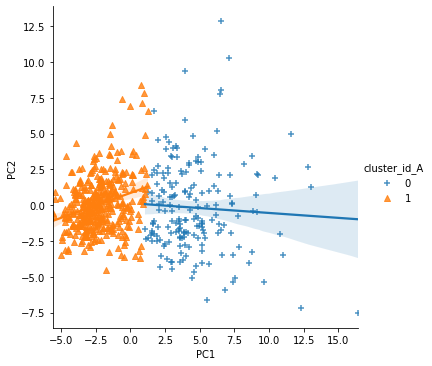

In [58]:
markers = ['+','^']
sns.lmplot("PC1","PC2", data=PCA_df, hue="cluster_id_A",markers=markers)

##### Forming clusters for for k = 3

In [59]:
kmeans2 = KMeans(n_clusters = 3)

In [60]:
Cluster2 = kmeans2.fit(PCA_df)
Cluster2

KMeans(n_clusters=3)

Predicting labels and centroids

In [61]:
labels2 = kmeans2.predict(PCA_df)
centroids2 = kmeans2.cluster_centers_ 

storing centroid values in a Dataframe 

In [62]:
centroids2_df = pd.DataFrame(centroids2)
centroids2_df.T

,0,1,2
0,2.471318,5.183217e+00,-2.429368
1,3.161560,-1.734499e+00,-0.209461
2,-0.753890,3.116573e-01,0.085268
3,0.305582,-1.063804e-01,-0.041474
4,0.318287,-1.830928e-01,-0.018151
5,0.179047,-3.679355e-02,-0.033148
6,0.318681,-6.661338e-16,0.997183


#### calculating Davies-Bouldin Score for k = 3

In [63]:
dbnn_score2 = davies_bouldin_score(PCA_df,labels2)
dbnn_score2

1.3911051239701824

Storing cluster labels in PCA DataFrame with column name 'cluster_id_B'

In [64]:
PCA_df['cluster_id_B'] = labels2

##### Presenting Data on a plane of two major component i.e PC1 and PC2 for k = 3

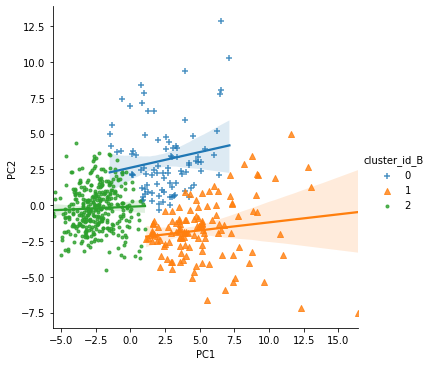

In [65]:
markers = ['+','^','.']
sns.lmplot("PC1","PC2", data=PCA_df, hue="cluster_id_B",markers=markers)

##### Forming clusters for for k = 5

In [66]:
kmeans3 = KMeans(n_clusters = 5)

In [67]:
Cluster3 = kmeans3.fit(PCA_df)
Cluster3

KMeans(n_clusters=5)

Predicting labels and centroids

In [68]:
labels3 = kmeans3.predict(PCA_df)
centroids3 = kmeans3.cluster_centers_ 

storing centroid values in a Dataframe 

In [69]:
centroids3_df = pd.DataFrame(centroids3)
centroids3_df.T

,0,1,2,3,4
0,-2.497029,8.818879,3.604536,2.641301,-2.398229
1,-1.171712,-0.932357,-2.042879,3.208156,1.308956
2,-0.044613,1.253570,-0.089777,-0.801216,0.299639
3,0.099135,-0.780579,0.157046,0.394932,-0.291597
4,0.466771,-0.340684,-0.115976,0.403850,-0.739808
5,-0.195810,-0.270734,0.037696,0.147430,0.227739
6,1.000000,0.000000,0.031579,0.302326,1.000000
7,2.000000,1.000000,1.010526,0.011628,1.959184


#### calculating Davies-Bouldin Score for k = 5

In [70]:
dbnn_score3 = davies_bouldin_score(PCA_df,labels3)
dbnn_score3

1.5743983625480122

Storing cluster labels in PCA DataFrame with column name 'cluster_id_C'

In [71]:
PCA_df['cluster_id_C'] = labels3

##### Final PCA DataFrame

In [72]:
PCA_df

,PC1,PC2,PC3,PC4,PC5,PC6,cluster_id_A,cluster_id_B,cluster_id_C
0,9.216724,2.136750,-0.996666,-3.701990,-1.254757,-1.375765,0,1,1
1,2.651244,-3.770741,-0.554319,-1.133415,0.553632,-0.122292,0,1,2
2,5.900697,-1.010916,-0.467841,-0.933755,-0.194575,-0.402068,0,1,2
3,7.137376,10.315636,-3.256828,-0.053782,-2.944419,-2.566997,0,0,3
4,4.139263,-1.916891,1.465280,-2.877471,0.360750,1.240987,0,1,2
...,...,...,...,...,...,...,...,...,...
564,6.589934,-3.444874,2.510880,-1.174516,-0.126673,2.030415,0,1,1
565,4.020812,-3.546088,1.989122,2.540585,-0.424258,-0.081741,0,1,2
566,1.525754,-1.950552,0.437068,2.092930,1.824089,0.400104,0,1,2
567,10.395832,1.871229,-1.808353,2.159371,0.205779,-0.667193,0,1,1


##### Presenting Data on a plane of two major component i.e PC1 and PC2 for k = 5

<Figure size 720x1152 with 0 Axes>

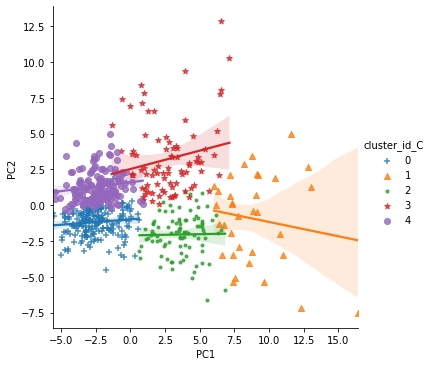

In [73]:
plt.figure(figsize=(10,16))
markers = ['+','^','.','*','o']
sns.lmplot("PC1","PC2", data=PCA_df, hue="cluster_id_C",markers=markers)